# Modelo normal

1. - Importar librerias

In [188]:
import os
import cv2
import numpy as np
from numpy import save
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import load
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

2. - Categroias

In [206]:
categories = ['Peculiar', 'Lenticular', 'Elliptical', 'Irregullar', 'Spiral']

3. - Escalar las imagenes para entrenamiento y almacenar junto con las etiquetas en un arreglo de numpy 

In [207]:
lw = 150
db_path = '/Users/bastian/PycharmProjects/Data_fits/galaxies'



training_data = []


def create_training_data():
    for category in categories:
        path = os.path.join(db_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):

            try:
                img_size = lw
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array,class_num])

            except Exception as e:

                pass


create_training_data()

x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

img_size = lw
x = np.array(x).reshape(-1, img_size, img_size)
y = np.array(y)

x = x/255
print(x.shape)
print(y.shape)
print(y)
print(len(y))

save('x.npy', x)
save('y.npy', y)

(3539, 150, 150)
(3539,)
[0 0 0 ... 4 4 4]
3539


4. - Entrenar la NNET y almacenar los valores de accuracy  y loss en un archivo pandas. 

In [208]:
print(tf.__version__)

lw = 150


x = load('x.npy')
y = load('y.npy')

print(len(x))




model = keras.Sequential([
    keras.layers.Flatten(input_shape=(lw, lw)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

checkpoint_path = "Checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
nep = 50
history = model.fit(x, y, epochs=nep)
print(history)

model.save('Galaxy_class.model')

vec = np.linspace(0, nep, 1000)
acc = history.history['accuracy']
loss = history.history['loss']
df = pd.DataFrame(list(zip(acc, loss)), columns=['Accuracy','Loss'])
df.to_csv('/Users/bastian/PycharmProjects/Data_fits/acc_loss_df.csv')
print(df)

2.2.0
3539
Epoch 1/50
111/111 [==============================] - 1s 11ms/step - loss: 2.3657 - accuracy: 0.2074
Epoch 2/50
111/111 [==============================] - 1s 11ms/step - loss: 1.6048 - accuracy: 0.2306
Epoch 3/50
111/111 [==============================] - 1s 11ms/step - loss: 1.5891 - accuracy: 0.2580
Epoch 4/50
111/111 [==============================] - 1s 11ms/step - loss: 1.5740 - accuracy: 0.2696
Epoch 5/50
111/111 [==============================] - 1s 11ms/step - loss: 1.5596 - accuracy: 0.2755
Epoch 6/50
111/111 [==============================] - 1s 12ms/step - loss: 1.5548 - accuracy: 0.2961
Epoch 7/50
111/111 [==============================] - 1s 12ms/step - loss: 1.5496 - accuracy: 0.3015
Epoch 8/50
111/111 [==============================] - 1s 12ms/step - loss: 1.5347 - accuracy: 0.3128
Epoch 9/50
111/111 [==============================] - 1s 13ms/step - loss: 1.5354 - accuracy: 0.2967
Epoch 10/50
111/111 [==============================] - 1s 12ms/step - loss: 1.53

5. - Escalar las imagenes para pruebas y almacenar junto con las etiquetas en un arreglo de numpy 

In [209]:
db_path = '/Users/bastian/PycharmProjects/Data_fits/ACC_test_db'


training_data=[]

def create_training_data():
    for category in categories:
        path = os.path.join(db_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):

            try:
                img_size = 150
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array,class_num])

            except Exception as e:

                pass

create_training_data()


x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)


img_size = 150
x = np.array(x).reshape(-1, img_size, img_size)
print(len(x))
print(len(y))


save('x_test.npy', x)
save('y_test.npy', y)

88
88


6. - Hacer las pruebas del modelo (Para navegar en las 106 imagenes modificar "ls" de 0 a 91)

3/3 [==============================] - 0s 2ms/step - loss: 1.4068 - accuracy: 0.4091

Test accuracy: 40.909090638160706 %
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_72 (Sequential)   (None, 10)                2881418   
_________________________________________________________________
softmax_50 (Softmax)         (None, 10)                0         
Total params: 2,881,418
Trainable params: 2,881,418
Non-trainable params: 0
_________________________________________________________________


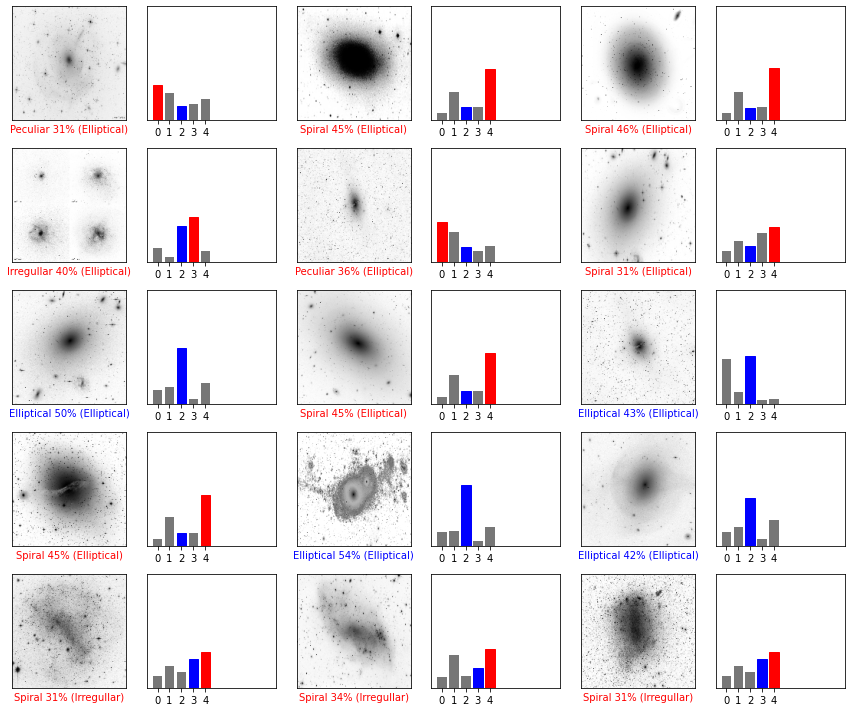

In [211]:

X = load('x_test.npy')/255
Y = load('y_test.npy')


model = tf.keras.models.load_model('Galaxy_class.model')


test_loss, test_acc = model.evaluate(X,  Y)

print('\nTest accuracy:', test_acc*100, '%')

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

probability_model.summary()

predictions = probability_model.predict(X)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(categories[predicted_label],
                                100*np.max(predictions_array),
                                categories[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(5))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))



ls = 43
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+ls, predictions[i+ls], Y, X)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+ls, predictions[i+ls], Y)
plt.tight_layout()
plt.show()



7. - Análisis del modelo 

In [212]:
nep = 50

data = pd.read_csv('acc_loss_df.csv')
acc = data['Accuracy']
loss = data['Loss']

vec = np.linspace(0, nep, nep)

fig = go.Figure()

fig.add_trace(go.Scatter(x = vec,y = acc, name='accuracy'))
fig.add_trace(go.Scatter(x = vec,y = loss, name='loss'))


high_annotations = [dict(x=vec,
                         y=acc,
                         xref="x", yref="y",
                         ax=0, ay=-40)]
low_annotations = [dict(x=vec,
                        y=loss,
                        xref="x", yref="y",
                        ax=0, ay=40)]




fig.update_layout(title='Model analysis',
                   xaxis_title='Epoch',
                   yaxis_title='Loss/Accuracy', font_size=14, width = 1000, height = 600)

fig.show()

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

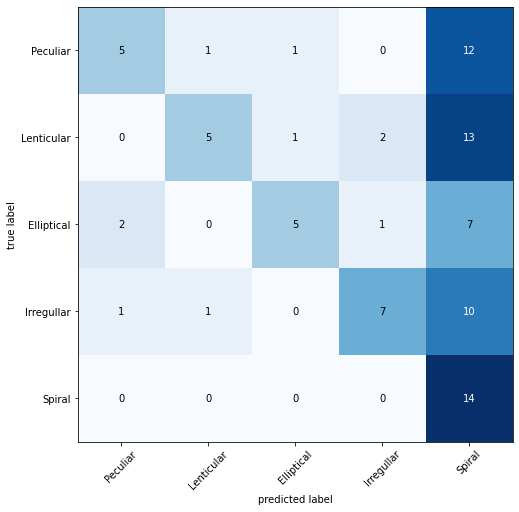

In [213]:
ypred = model.predict_classes(X)

mat = confusion_matrix(Y, ypred)

plot_confusion_matrix(conf_mat=mat, class_names = categories, figsize = (8,8))

UsageError: Line magic function `%tensorboard` not found.
